In [1]:
from ipstartup import *
croot = "c:" if os.name=="nt" else "/mnt/c"
droot = "d:" if os.name=="nt" else "/mnt/d"
slab = f"{croot}/Users/simon/OneDrive/Documents/py/live/slab/slab"
data = f"{droot}/data1"
sys.path.append(slab)
os.makedirs(data, exist_ok=True)
os.chdir(data)

os.environ["PREFECT_DISABLED"] = "1"
from preprocess.tasks import *
from preprocess.utils import *
import spacy
from spacy import displacy
#log.setLevel(logging.DEBUG)

[defaultlog:22:INFO]:logging started from c:\users\simon\onedrive\documents\py\live\pyutils\defaultlog.py (time=Jul-01 20:12 MainProcess)


[__init__:26:WARNING]:prefect is disabled as PREFECT_DISABLED environment variable exists (time=Jul-01 20:12 MainProcess)


In [2]:
df = pd.read_pickle('working/esg')

[cellevents:43:INFO]:starting (time=Jul-01 20:12 MainProcess)


time: 40.9 ms


# esg topic and sentences

In [9]:
for i, x in df[df.esg2!="outofscope"].sample(10).iterrows():
    print(x.esg2)
    print(x.sent)
    print("*******************")

[cellevents:43:INFO]:starting (time=Jul-01 20:14 MainProcess)


Critical_Incident_Risk_Management
In June 2020 we launched our Global Wellbeing Charter, a new initiative which provides close to £1m in monetary support to help support global projects and people in our supply chain through the Covid-19 emergency.
*******************
Management_Of_Legal_And_Regulatory_Framework
GRI 102-18:19 102-21:29 102-33 405-1 For an in-depth discussion of UBI Banca’s governance system, see the report on this matter contained in the document Reports and Accounts 2019 .
*******************
Management_Of_Legal_And_Regulatory_Framework
Direct result 20192.03 Like-for-like growth in net rental income excluding COVID-190.02 Like-for-like decrease in net rental income due to COVID-19(0.33) Decrease in net rental income due to acquisitions and divestments(0.04) Increase in financing costs due to higher average interest bearing debtDecrease in finance costs due to change in average interest rate0.09 Decrease in general expenses0.04 Increase in income tax(0.02) Decrease of

# crosstab esg-bert and keywords

In [367]:
ct = pd.crosstab(df.esg2, df.topic1)

ct["subtopic"] = ct.apply(lambda x: x[x.index!="outofscope"].idxmax(), axis=1)
ct.loc[ct.index=="outofscope", "subtopic"] = "outofscope"


ct.insert(0, "subtopic", ct.pop("subtopic"))
kw = pd.read_excel("keywords.xlsx")
kw.columns = [x.lower() for x in kw.columns]
kw = kw.append(dict(topic="outofscope", subtopic="outofscope"), ignore_index=True)

# add topic to rows
ct = ct.reset_index()
ct = kw[["topic", "subtopic"]].merge(ct, on="subtopic", how="left")
ct = ct.set_index(["topic", "subtopic", "esg2"], drop=True)
ct = ct.sort_index()

# add topic to cols
for col in set(kw.subtopic.tolist()) - set(ct.columns):
    ct[col] = None
ct = ct.fillna(0).astype(int)
topics = pd.Series(ct.columns).map(pd.Series(kw.set_index("subtopic").topic))
ct.columns = [x for x in zip(topics, ct.columns)]
ct = ct.sort_index(axis=1)

def highlight(x):
    return np.where((x == x[x.index!=("outofscope","outofscope")].max()) & (x!=0), 'background-color: lightgreen', None)
ct = ct.style.apply(highlight, axis=1)  
ct.to_excel("crosstab.xlsx")
ct

[cellevents:43:INFO]:starting (time=Jun-29 20:06 MainProcess)


time: 390 ms


# other

In [3]:
df.topic1.value_counts()

[cellevents:43:INFO]:starting (time=Jun-29 14:18 MainProcess)


Energy                                         288
Employee Engagement & Diversity & Inclusion    181
Sustainable Economic Performance                70
Occupational health and safety                  66
Waste                                           44
Water                                           36
Materials                                       31
Biodiversity                                    29
Mobility                                        19
Human Rights & Community Relations              17
Business ethics                                 12
Product Governance                               4
Labor Practices                                  4
Air                                              3
Environmental Impact                             3
Supply Chain Management                          2
Security & Privacy                               2
Name: topic1, dtype: int64

time: 11 ms


In [4]:
df.esg2.value_counts()

[cellevents:43:INFO]:starting (time=Jun-29 14:18 MainProcess)


outofscope                                      1334
Management_Of_Legal_And_Regulatory_Framework     497
Systemic_Risk_Management                         229
Energy_Management                                214
Product_Design_And_Lifecycle_Management          132
Labor_Practices                                  126
GHG_Emissions                                    110
Employee_Engagement_Inclusion_And_Diversity      109
Human_Rights_And_Community_Relations             100
Director_Removal                                  72
Access_And_Affordability                          60
Business_Model_Resilience                         59
Business_Ethics                                   57
Supply_Chain_Management                           57
Waste_And_Hazardous_Materials_Management          54
Employee_Health_And_Safety                        54
Physical_Impacts_Of_Climate_Change                48
Water_And_Wastewater_Management                   39
Competitive_Behavior                          

time: 7.35 ms


[cellevents:43:INFO]:starting (time=Jun-29 14:18 MainProcess)


<AxesSubplot:>

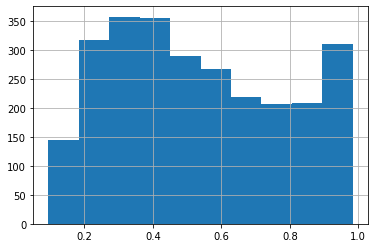

time: 403 ms


In [6]:
df.loc[df.ntopics==0].score.hist()

[cellevents:43:INFO]:starting (time=Jun-29 14:19 MainProcess)


<AxesSubplot:>

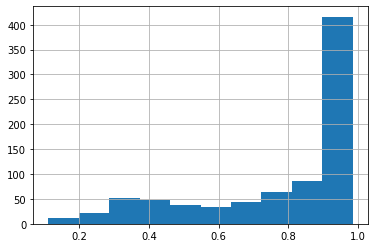

time: 246 ms


In [8]:
df.loc[df.ntopics>0].score.hist()